# A stroll through the `kozai` python package

## Installation

The `kozai` package is available on PyPI and can be installed with `pip` like so:

```
pip install kozai
```

If you don't have the right permissions, try installing it like this:

```
pip install --user kozai
```

If you run into problems with the package tests, please let me know at `antognini@astronomy.ohio-state.edu` so we can work to fix them.  Note that the `kozai` package only works on Python 2 at the moment. 

## Making your first triple

The `kozai` package makes it easy to create and evolve triples.  The package comes with two classes which represent triples in different ways: `TripleDelaunay` and `TripleVectorial`.  The `TripleDelaunay` class represents the triple using the Delaunay orbital elements and the `TripleVectorial` class represents the triple using the eccentricity and angular momentum vectors.  At the moment, the `TripleVectorial` class only supports triples with a test particle secondary, whereas `TripleDelaunay` requires that all three stars have mass.

The `TripleDelaunay` class currently has more features than the `TripleVectorial` , so I recommend using the `TripleDelaunay` class wherever possible.  If you need to evolve a triple in the test particle approximation you can simply set the secondary mass to be something very small (e.g., $10^{-5}$ $M_{\odot}$).

To start with we will use the `TripleDelaunay` class and explore the `TripleVectorial` class later.  We first have to import the class from the `kozai.delaunay` module:

In [1]:
from kozai.delaunay import TripleDelaunay

To create a triple we just call `TripleDelaunay`:

In [2]:
triple = TripleDelaunay()

This triple has some default orbital parameters.  We can see what the inner semi-major axis is:

In [3]:
triple.a1

1.0

Note that the semi-major axes are all in AU.  Let's take a look at the inclination:

In [4]:
print('{0:.0f}'.format(triple.inc))

80


Note that the angles are given in degrees.

## Evolving a triple

Now that we have a high-inclination triple we can evolve it in time and see Kozai-Lidov oscillations.  To start with, let's turn the octupole term off so that we are just looking at quadrupole oscillations:

In [5]:
triple.octupole = False

Now let's evolve the triple for $3 \times 10^4$ yr:

In [6]:
evolution = triple.evolve(3e4)

`evolution` is a numpy array where each entry is a different step in time.  Each entry has the format

- $t$ (yr)
- $a_1$ (AU)
- $e_1$
- $g_1$ ($^{\circ}$)
- $a_2$ (AU)
- $e_2$
- $g_2$ ($^{\circ}$)
- $i$ ($^{\circ}$)]

Let's now see how the eccentricity changes in time.

In [7]:
%pylab inline
rcParams.update({'font.size': 22})

Populating the interactive namespace from numpy and matplotlib


In [8]:
t = evolution[:, 0]

In [9]:
e = evolution[:, 2]

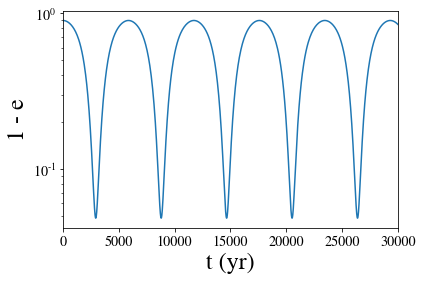

In [10]:
plot(t, 1 - e)
yscale('log')
xlim([0, 3e4])
xlabel('t (yr)')
ylabel('1 - e');

We see here some nice Kozai-Lidov oscillations.  Let's look at how the inclination changes in time:

In [11]:
inc = evolution[:, -1]

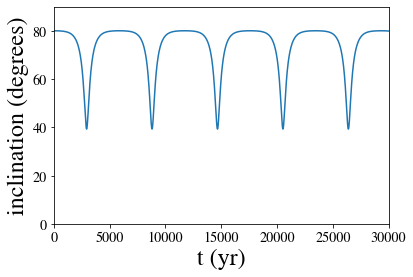

In [12]:
plot(t, inc)
xlim([0, 3e4])
ylim([0, 90])
xlabel('t (yr)')
ylabel('inclination (degrees)');

We see that we start out at $80^{\circ}$ and then move to close to the Kozai critical angle of $39.2^{\circ}$.

## The Eccentric KL Mechanism

Let's now take a look at what happens when we turn on the octupole order term.  First we have to reset our triple:

In [13]:
triple.reset()

Now the triple has been reset to its initial conditions.  So the time is set to 0:

In [14]:
triple.t

0.0

And the eccentricity and inclination are both at their original values:

In [15]:
triple.e1

0.1

In [16]:
print('{0:.0f}'.format(triple.inc))

80


Let's now turn the octupole term on:

In [17]:
triple.octupole = True

Since we're looking for longer-term changes to the KL cycles we'll evolve this system for $10^5$ yr.

In [18]:
evolution = triple.evolve(1e5)

Now let's take a look at the eccentricity evolution:

In [19]:
t = evolution[:, 0]
e = evolution[:, 2]

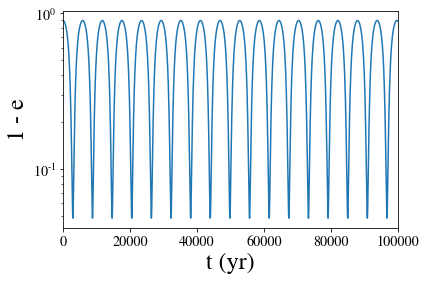

In [20]:
plot(t, 1 - e)
yscale('log')
xlim([0, 1e5])
xlabel('t (yr)')
ylabel('1 - e');

It's exactly the same as before!  Why is that?  Let's take a look at the masses of our stars:

In [21]:
triple.m1

1.0

In [22]:
triple.m2

1.0

By default our triple has an equal mass inner binary, so the octupole order term is zero!  We can see this explicitly by looking at the $C_3$ coefficient:

In [23]:
triple.C3

0.0

But the $C_2$ coefficient is not zero:

In [24]:
triple.C2

7.941780708528179e+33

Note that the unit here is Joules.

In order to see the eccentric Kozai mechanism we need to have an unequal mass inner binary, so let's reset the triple and set the mass of the secondary to be something small, like $10^{-5}$ $M_{\odot}$.

In [25]:
triple.reset()

In [26]:
triple.m2 = 1e-5

In [27]:
evolution = triple.evolve(1e5)

And now we'll take a look at the eccentricity evolution:

In [28]:
t = evolution[:, 0]
e = evolution[:, 2]

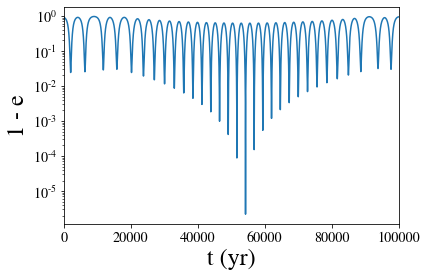

In [29]:
plot(t, 1 - e)
yscale('log')
xlim([0, 1e5])
xlabel('t (yr)')
ylabel('1 - e');

We can see the characteristic increase in the maximum eccentricity during each KL oscillation as the orbit of the inner binary flips from prograde to retrograde.  Let's see what's happening to the orbital inclination:

In [30]:
inc = evolution[:, -1]

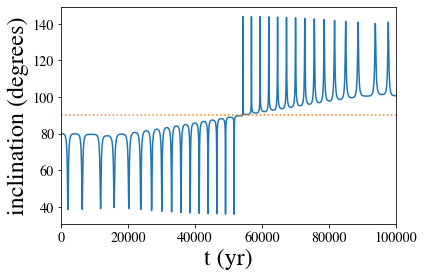

In [31]:
plot(t, inc)
xlim([0, 1e5])
xlabel('t (yr)')
ylabel('inclination (degrees)')
plot(linspace(0, 1e5, num=100), 90 * np.ones(100), ls=':');

## Some other features of the `TripleDelaunay` class

### Setting the orbital parameters

The `TripleDelaunay` class comes with a number of other features to make it easy to work with.  You can set the orbital parameters of the triple from the call to the class:

In [32]:
triple = TripleDelaunay(a1=1, a2=10, e1=.01, e2=.15, inc=85, m2=.5)

### Printing the triple parameters

It is also easy to get general information about the triple.  If `print` is called the class returns the various parameters of the triple in JSON format:

In [33]:
print(triple)

{
  "a1": 1.0,
  "a2": 10.0,
  "algo": "vode",
  "atol": 1e-09,
  "collision": false,
  "cputstop": 300,
  "e1": 0.01,
  "e2": 0.15,
  "epsoct": 0.015345268542199487,
  "g1": 0.0,
  "g2": 0.0,
  "gr": false,
  "hexadecapole": false,
  "inc": 84.99999999999997,
  "m1": 1.0,
  "m2": 0.5,
  "m3": 1.0,
  "maxoutput": 1000000,
  "octupole": true,
  "outfreq": 1,
  "quadrupole": true,
  "r1": 0.0,
  "r2": 0.0,
  "rtol": 1e-09,
  "tstop": null
}


If you're working with many triples this makes it easy to keep track of the parameters of each one.

### Getting the eccentricity extrema

If you're evolving a triple over a long period of time you may not be interested in most of the evolution.  Instead you may just want the points at which the eccentricity is at its largest or smallest.  To only get the eccentricity extrema the `TripleDelaunay` class has an `extrema` method:

In [34]:
triple = TripleDelaunay(a1=1, a2=20, e1=.1, e2=.3, inc=80, m2=.01)
extrema = triple.extrema(1e5)

Let's compare the extrema to the full evolution:

In [35]:
triple = TripleDelaunay(a1=1, a2=20, e1=.1, e2=.3, inc=80, m2=.01)
evolution = triple.evolve(1e5)

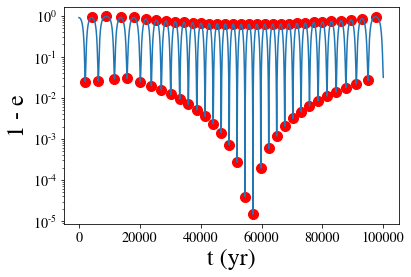

In [36]:
plot(evolution[:, 0], 1 - evolution[:, 2])
yscale('log')
scatter(extrema[:, 0], 1 - extrema[:, 2], c='r', s=100)
xlabel('t (yr)')
ylabel('1 - e');

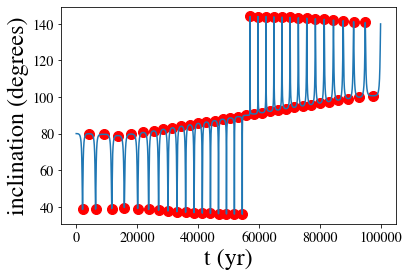

In [37]:
plot(evolution[:, 0], evolution[:, -1])
scatter(extrema[:, 0], extrema[:, -1], c='r', s=100)
xlabel('t (yr)')
ylabel('inclination (degrees)');

## Finding flips

Over even longer timescales we may just be interested in the times that the inner orbit flips from prograde to retrograde or vice versa.  To find these moments `TripleDelaunay` has the `find_flip` method:

In [38]:
triple = TripleDelaunay(m2=1e-5)
flips = triple.find_flips(1e6)

Let's compare to the full evolution.

In [39]:
triple = TripleDelaunay(m2=1e-5)
evolution = triple.evolve(1e6)

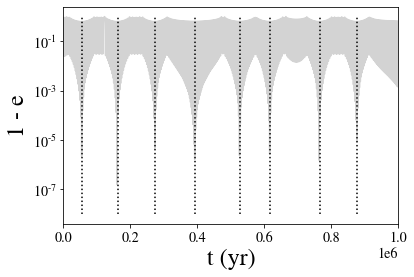

In [40]:
plot(evolution[:, 0], 1 - evolution[:, 2], c='lightgray')
xlim([0, 1e6])
yscale('log')
for elem in flips:
    plot(elem[0] * np.ones(50), np.logspace(-8, 0, num=50), ls=':', c='k')

xlabel('t (yr)')
ylabel('1 - e');

Note that this method just looks for a change in the sign of $\cos i$.  For massive secondaries the "pole" in the Hamiltonian at which arbitrarily large eccentricities are possible occurs at inclinations slightly larger than $90^{\circ}$.  `find_flip` will just find when the orbit crosses $90^{\circ}$, not when the arbitrarily large eccentricities occur.

## The `vectorial` module

As mentioned at the beginning, the `kozai` package offers two classes to evolve hierarchical triples, of which `TripleDelaunay` is currently more powerful.  But in cases where the test particle approximation is used the `TripleVectorial` class may be preferable.  The two classes have been designed to have APIs as similar to each other as possible.  Thus the methods between the two classes are mostly the same.  The major differences are as follows:

- The mass of the secondary cannot be set in `TripleVectorial` --- it is always 0.  Similarly, the mass of the secondary cannot be set to 0 in `TripleDelaunay` (although it can be set to some very small non-zero value). 
- Post-Newtonian terms are not supported in `TripleVectorial` yet.
- The hexadecapole term is not included in `TripleVectorial` yet.
- `vectorial` has an additional method called `flip_period` which can be used to numerically calculate the time between flips.  This will be described in more detail a little later.

### Evolving a triple in `vectorial`

Triples can be made in `TripleVectorial` in much the same way as in `TripleDelaunay`:

In [41]:
from kozai.vectorial import TripleVectorial

In [42]:
triple = TripleVectorial()

In [43]:
evolution = triple.evolve(1e5)

We can examine the eccentricity evolution in the same way as before:

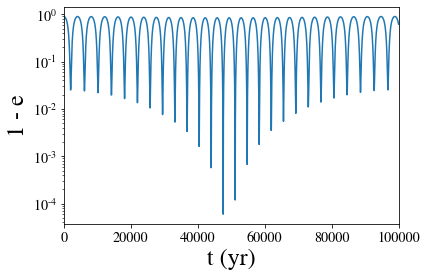

In [44]:
plot(evolution[:, 0], 1 - evolution[:, 2])
yscale('log')
xlim([0, 1e5])
xlabel('t (yr)')
ylabel('1 - e');

And similarly we can examine the evolution of the inclination:

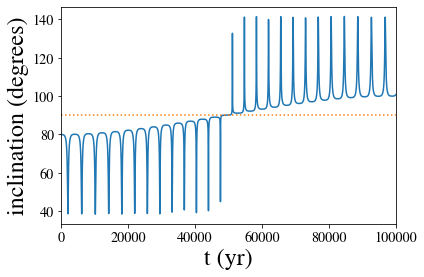

In [45]:
plot(evolution[:, 0], evolution[:, -1])
xlim([0, 1e5])
xlabel('t (yr)')
ylabel('inclination (degrees)')
plot(np.linspace(0, 1e5, num=50), 90 * np.ones(50), ls=':');

And just as with `TripleDelaunay` we can just take the eccentricity maxima:

In [46]:
triple.reset()

In [47]:
extrema = triple.extrema(1e5)

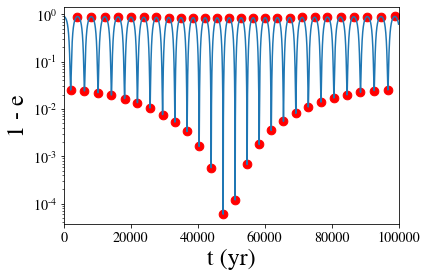

In [48]:
plot(evolution[:, 0], 1 - evolution[:, 2])
yscale('log')
xlim([0, 1e5])
xlabel('t (yr)')
ylabel('1 - e')
scatter(extrema[:, 0], 1 - extrema[:, 2], c='r', s=75);

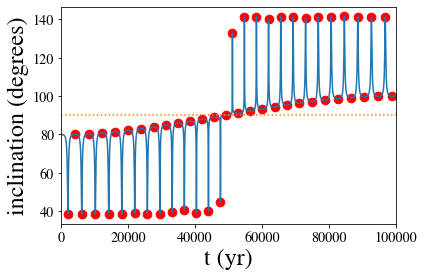

In [49]:
plot(evolution[:, 0], evolution[:, -1])
xlim([0, 1e5])
xlabel('t (yr)')
ylabel('inclination (degrees)')
plot(np.linspace(0, 1e5, num=50), 90 * np.ones(50), ls=':')
scatter(extrema[:, 0], extrema[:, -1], c='r', s=75);

### The `flip_period` method

The `TripleVectorial` class has one unique method: `flip_period`.  This method will integrate along until some specified number of flips have occured (by default three) and will return the average time between flips.  This method was not included in `TripleDelaunay` because arbitrarily large eccentricities do occur when the triple passes through some inclination slightly above $90^{\circ}$ which is dependent in a non-trivial way on the orbital and physical parameters of the system.  In the test particle case this critical inclination is always $90^{\circ}$ so it is easy to know when arbitrarily large eccentricities are possible.

The method can be used very easily:

In [50]:
triple = TripleVectorial()
p = triple.flip_period()
print(p)

98594.8567867995


Let's compare this to evolving the triple directly.

In [51]:
triple.reset()
evolution = triple.evolve(4e5)

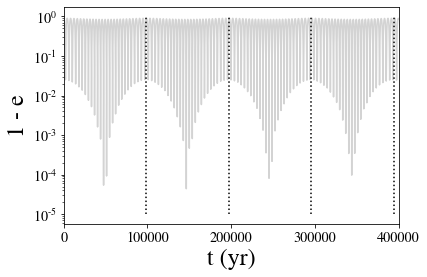

In [52]:
plot(evolution[:, 0], 1 - evolution[:, 2], c='lightgray')

locator_params(nbins=4)
yscale('log')
xlim([0, 4e5])
xlabel('t (yr)')
ylabel('1 - e')

for i in range(1, 5):
    plot(i * p * np.ones(50), np.logspace(-5, 0, num=50), ls=':', c='k');

So the flip period looks to have been calculated correctly!

## The `kl_period` module

The `kl_period` module has a number of utilities to calculate the timescales in hierarchical triples.  To start, let's import the module, create a triple, and calculate the orbital times:

In [53]:
import kozai.kl_period as klp

In [54]:
triple = TripleVectorial(a1=1, a2=10, e1=.05, e2=.1, inc=80)

In [55]:
klp.P_in(triple)

1.0

In [56]:
klp.P_out(triple)

22.360679774997898

We can also use the standard KL timescale to estimate the period of KL oscillations:

$$t_{\textrm{KL}} \sim \frac{8}{15 \pi} \left(1 + \frac{m_1}{m_3}\right) \left(\frac{P_{\textrm{out}}^2}{P_{\textrm{in}}}\right)\left(1 - e_2^2\right)^{3/2}$$

In [57]:
klp.kl_period_oom(triple)

167.2251703899268

Let's compare this to the evolution of the triple.

In [58]:
evolution = triple.evolve(1e3)

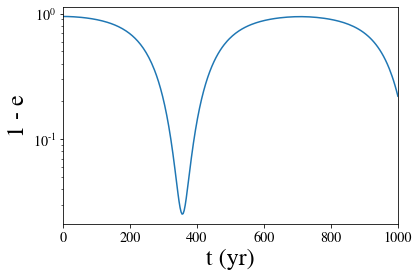

In [59]:
plot(evolution[:, 0], 1 - evolution[:, 2])

xlim([0, 1e3])
xlabel('t (yr)')
ylabel('1 - e')
yscale('log');

So the timescale is off by a factor of a few.  For `TripleVectorial` objects we can calculate the period exactly, however, using equation (33) of Antognini (2015), which is implemented in `kl_period`:

In [60]:
triple.reset()
klp.kl_period(triple)

/home/joe/code/kozai/kozai/kl_period.py:75: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(


716.4024387862976

This matches the observed period much more closely.  We can verify this by evolving the triple and calculating the mean time between eccentricity maxima using the `numeric_kl_period` function:

In [61]:
triple.reset()
klp.numeric_kl_period(triple)

673.5476431427444

Evidently the numeric period does not too closely match the analytic period.  This is because the length of a KL oscillation varies from one oscillation to the next due to the octupole order term.  If the octupole term is turned off, these variations should vanish and we should match the result from `kl_period` much more closely:

In [62]:
triple.reset()
triple.octupole = False
klp.numeric_kl_period(triple)

715.9436182420778

One final feature of the `kl_period` module is the `is_librating` function.  As its name implies, it returns `True` if the triple librates and `False` if it rotates:

In [63]:
klp.is_librating(triple)

False

## The `ekm` module

The last module we'll explore is the `ekm` module.  This module presents a new class called `TripleOctupole`.  This class makes it possible to evolve a hierarchical triple in the test particle limit by averaging over individual KL oscillations so as to capture only the contribution from the octupole term.

In [64]:
from kozai.ekm import TripleOctupole
triple = TripleOctupole(e1=.1, Omega=180, inc=80, epsoct=.01)

We can evolve this triple in time.  The `evolve` method returns the following:

- $t$ (in units of the secular timescale)
- $j_z$
- $\Omega$ (in degrees)
- $\left< f_j \right>$
- $\left< f_{\Omega} \right>$
- $x$

See Katz et al. (2011) for definitions of these quantities.

In [65]:
evolution = triple.evolve(400)

We can now see the change in the $z$-component of the angular momentum as the inner binary undergoes a few flips:

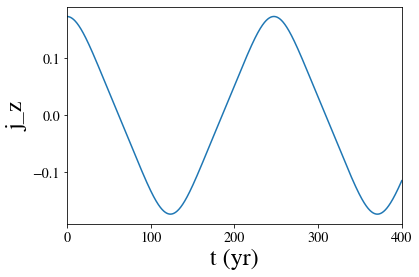

In [66]:
plot(evolution[:, 0], evolution[:, 1])
xlim([0, 400])
xlabel('t (yr)')
ylabel('j_z');

As with `TripleDelaunay` and `TripleVectorial` we can print out the properties of the triple in JSON format:

In [67]:
print(triple)

{
  "CKL": 0.01,
  "Omega": 180.0,
  "algo": "vode",
  "atol": 1e-09,
  "chi": 0.022720067311553332,
  "cputstop": 300,
  "e1": 0.1,
  "g1": 0.0,
  "inc": 80.0,
  "jz": 0.1727777552550541,
  "maxoutput": 1000000,
  "outfreq": 1,
  "phiq": 0.024926076355487686,
  "rtol": 1e-09,
  "tstop": 400
}


Finally, we can calculate the time between flips two different ways.  We can either do it analytically using equation (67) of Antognini (2015) using the `flip_period` method:

In [68]:
triple.reset()
triple.flip_period()

/home/joe/code/kozai/kozai/ekm.py:297: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  P = quad(


123.6079642426734

We can also calculate the flip period numerically by evolving the triple directly using `numeric_flip_period`:

In [69]:
triple.numeric_flip_period()

123.53423155777053

As we would hope, these two calculations yield very similar results.